In [1]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
target

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [3]:
x_train = pd.read_csv('x_train.csv')
x_train = x_train.set_index('Unnamed: 0')
x_train = x_train.T
x_train

Unnamed: 0,BTN3A2,RAN,EIF5AL1///EIF5A,PIGK,HLA-DRB5,YWHAE,SNORD115-48,PDIA3P1///PDIA3,PLS3,TBCA,...,RAP1B,RAB18,ZNF845,RAP1A,TRAPPC6B,TMEM106B,MYL12B///MYL12A,HLA-DRB1///HLA-DQB1,NSA2,LOC1720///DHFR
GSM4037893,0.003663,1.296513,0.842489,1.645879,0.859475,1.154441,0.060045,1.209702,1.296513,0.947671,...,1.340023,1.150141,1.146769,1.356639,1.044048,1.489626,0.945493,1.224023,0.746551,1.659916
GSM4037883,-1.565555,-1.041235,-1.580540,-1.498232,-0.892977,-1.417665,-0.932528,-1.692371,-1.041235,-0.854380,...,-1.202061,-1.552294,-1.701836,-0.545864,-1.593693,-1.647185,-1.539416,-1.064939,-0.733197,-1.141855
GSM4037881,-2.498962,-1.353533,-0.864738,-0.906858,-1.334608,-0.492159,0.096760,-0.653560,-1.353533,0.810863,...,-0.291230,-0.663915,-0.416719,-0.664255,-0.725277,-1.103515,0.133528,-0.864548,0.750284,-0.734983
GSM4037895,0.283199,-0.101719,0.178311,-0.657378,-0.421517,-0.807999,-0.009209,-0.641367,-0.101719,-1.167585,...,-1.012009,-1.322245,-0.412455,-1.066447,-1.103180,-1.030179,-1.269582,-0.849326,-1.307353,-1.187469
GSM4037896,-0.311080,1.110614,0.850500,0.332910,1.113483,1.045284,-0.133271,0.718585,1.110614,0.720399,...,0.650990,1.053615,1.201724,1.261702,0.779371,1.228639,0.665147,1.217480,1.482988,1.014685
GSM4037888,0.770182,0.873930,1.241005,1.093727,2.431117,0.751971,-0.676388,1.241011,0.873930,-0.391537,...,0.567553,0.878191,-0.154104,0.684431,1.023572,0.045122,0.264238,1.547189,-0.018727,0.550488
GSM4037886,0.412028,-0.118020,-0.673617,-1.442639,-0.496741,-0.063174,1.182692,-0.734666,-0.118020,-1.426654,...,-0.938507,-0.129414,-0.817761,-0.815006,-0.116546,-0.198045,-1.149889,-1.183779,-0.323231,-0.542047
GSM4037892,0.947977,1.704021,1.377007,1.799832,-1.162753,1.733626,-0.319193,1.087394,1.704021,0.952776,...,1.056252,1.617296,1.240273,1.179269,1.486577,1.524950,0.856520,-0.251372,0.704183,1.228655
GSM4037890,1.414062,-0.423026,0.327334,-0.090831,0.483410,-0.267763,-0.742407,0.677035,-0.423026,-0.238621,...,0.052046,-0.180283,-0.486424,0.011062,-0.168495,0.045658,0.095574,-0.247661,0.426628,0.255295
GSM4037882,-0.162707,0.218018,-0.031997,0.515559,-0.569073,0.312090,-0.498316,-0.186864,0.218018,0.196347,...,0.316969,0.032328,-0.069294,0.225081,-0.056486,0.266069,0.306742,0.021538,0.298213,0.260475


In [4]:
x_test = pd.read_csv('x_test.csv')
x_test = x_test.set_index('Unnamed: 0')
x_test

,BTN3A2,RAN,EIF5AL1///EIF5A,PIGK,HLA-DRB5,YWHAE,SNORD115-48,PDIA3P1///PDIA3,PLS3,TBCA,...,RAP1B,RAB18,ZNF845,RAP1A,TRAPPC6B,TMEM106B,MYL12B///MYL12A,HLA-DRB1///HLA-DQB1,NSA2,LOC1720///DHFR
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GSM4037880,-0.436552,-0.442254,-0.128473,-0.010031,0.188906,-0.028059,0.740370,-0.593710,-0.442254,0.411255,...,0.246026,0.178596,0.034103,0.174451,0.018923,-0.005216,0.128663,0.354363,0.088033,0.313358
GSM4037885,-0.554584,-0.472942,0.050538,-0.547474,-0.253403,-0.283583,1.566475,0.116523,-0.472942,-0.108443,...,-0.051144,-0.317769,0.736108,-1.063807,-0.345000,-0.455248,1.336151,0.276232,-0.283021,-0.016640
GSM4037887,0.115805,-0.266582,0.557585,0.297956,-0.074908,0.240678,-0.635138,0.320862,-0.266582,0.423609,...,0.457544,0.102898,-0.394922,0.327692,0.483112,0.289505,0.388940,-0.643741,-0.129608,-1.065697
GSM4037889,0.658964,0.237302,0.533163,-0.144023,1.606565,0.310464,-0.292744,0.430483,0.237302,0.330807,...,0.366012,0.570969,-0.079925,0.474191,0.914665,0.325969,0.169443,2.274448,1.150913,0.607737


In [5]:
y_train = pd.read_csv('y_train.csv')
y_train

,label
0,1
1,0
2,0
3,1
4,1
5,1
6,0
7,1
8,1
9,0


In [6]:
y_test = pd.read_csv('y_test.csv')
y_test

,label
0,0
1,0
2,1
3,1


In [7]:
#Use the Random Forest(RF) algorithm to rank the feature importance on the training set
param_grid_rf = {
                 'n_estimators':np.arange(100, 1000, 100),
                 'criterion':['gini', 'entropy'],
}

In [8]:
rfc = RandomForestClassifier(random_state=12345)
GS = GridSearchCV(rfc,param_grid_rf,cv=5)
GS.fit(x_train,y_train)
print(GS.best_params_)
print(GS.best_score_)

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

{'criterion': 'gini', 'n_estimators': 800}
0.8


In [9]:
# Train the model with best parameter
rfc=RandomForestClassifier(criterion='gini',  n_estimators=800, random_state=12345)
rfc=rfc.fit(x_train,y_train)
#Score the Random forest
y_pred = rfc.predict(x_test)
print(accuracy_score(y_test, y_pred))
aaa = pd.DataFrame(rfc.feature_importances_)
aaa.to_csv('feature_weights.csv', header=None)

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.75


In [10]:
aaa

,0
0,0.018999
1,0.029709
2,0.061405
3,0.019483
4,0.064431
5,0.003216
6,0.006082
7,0.033493
8,0.022048
9,0.007083


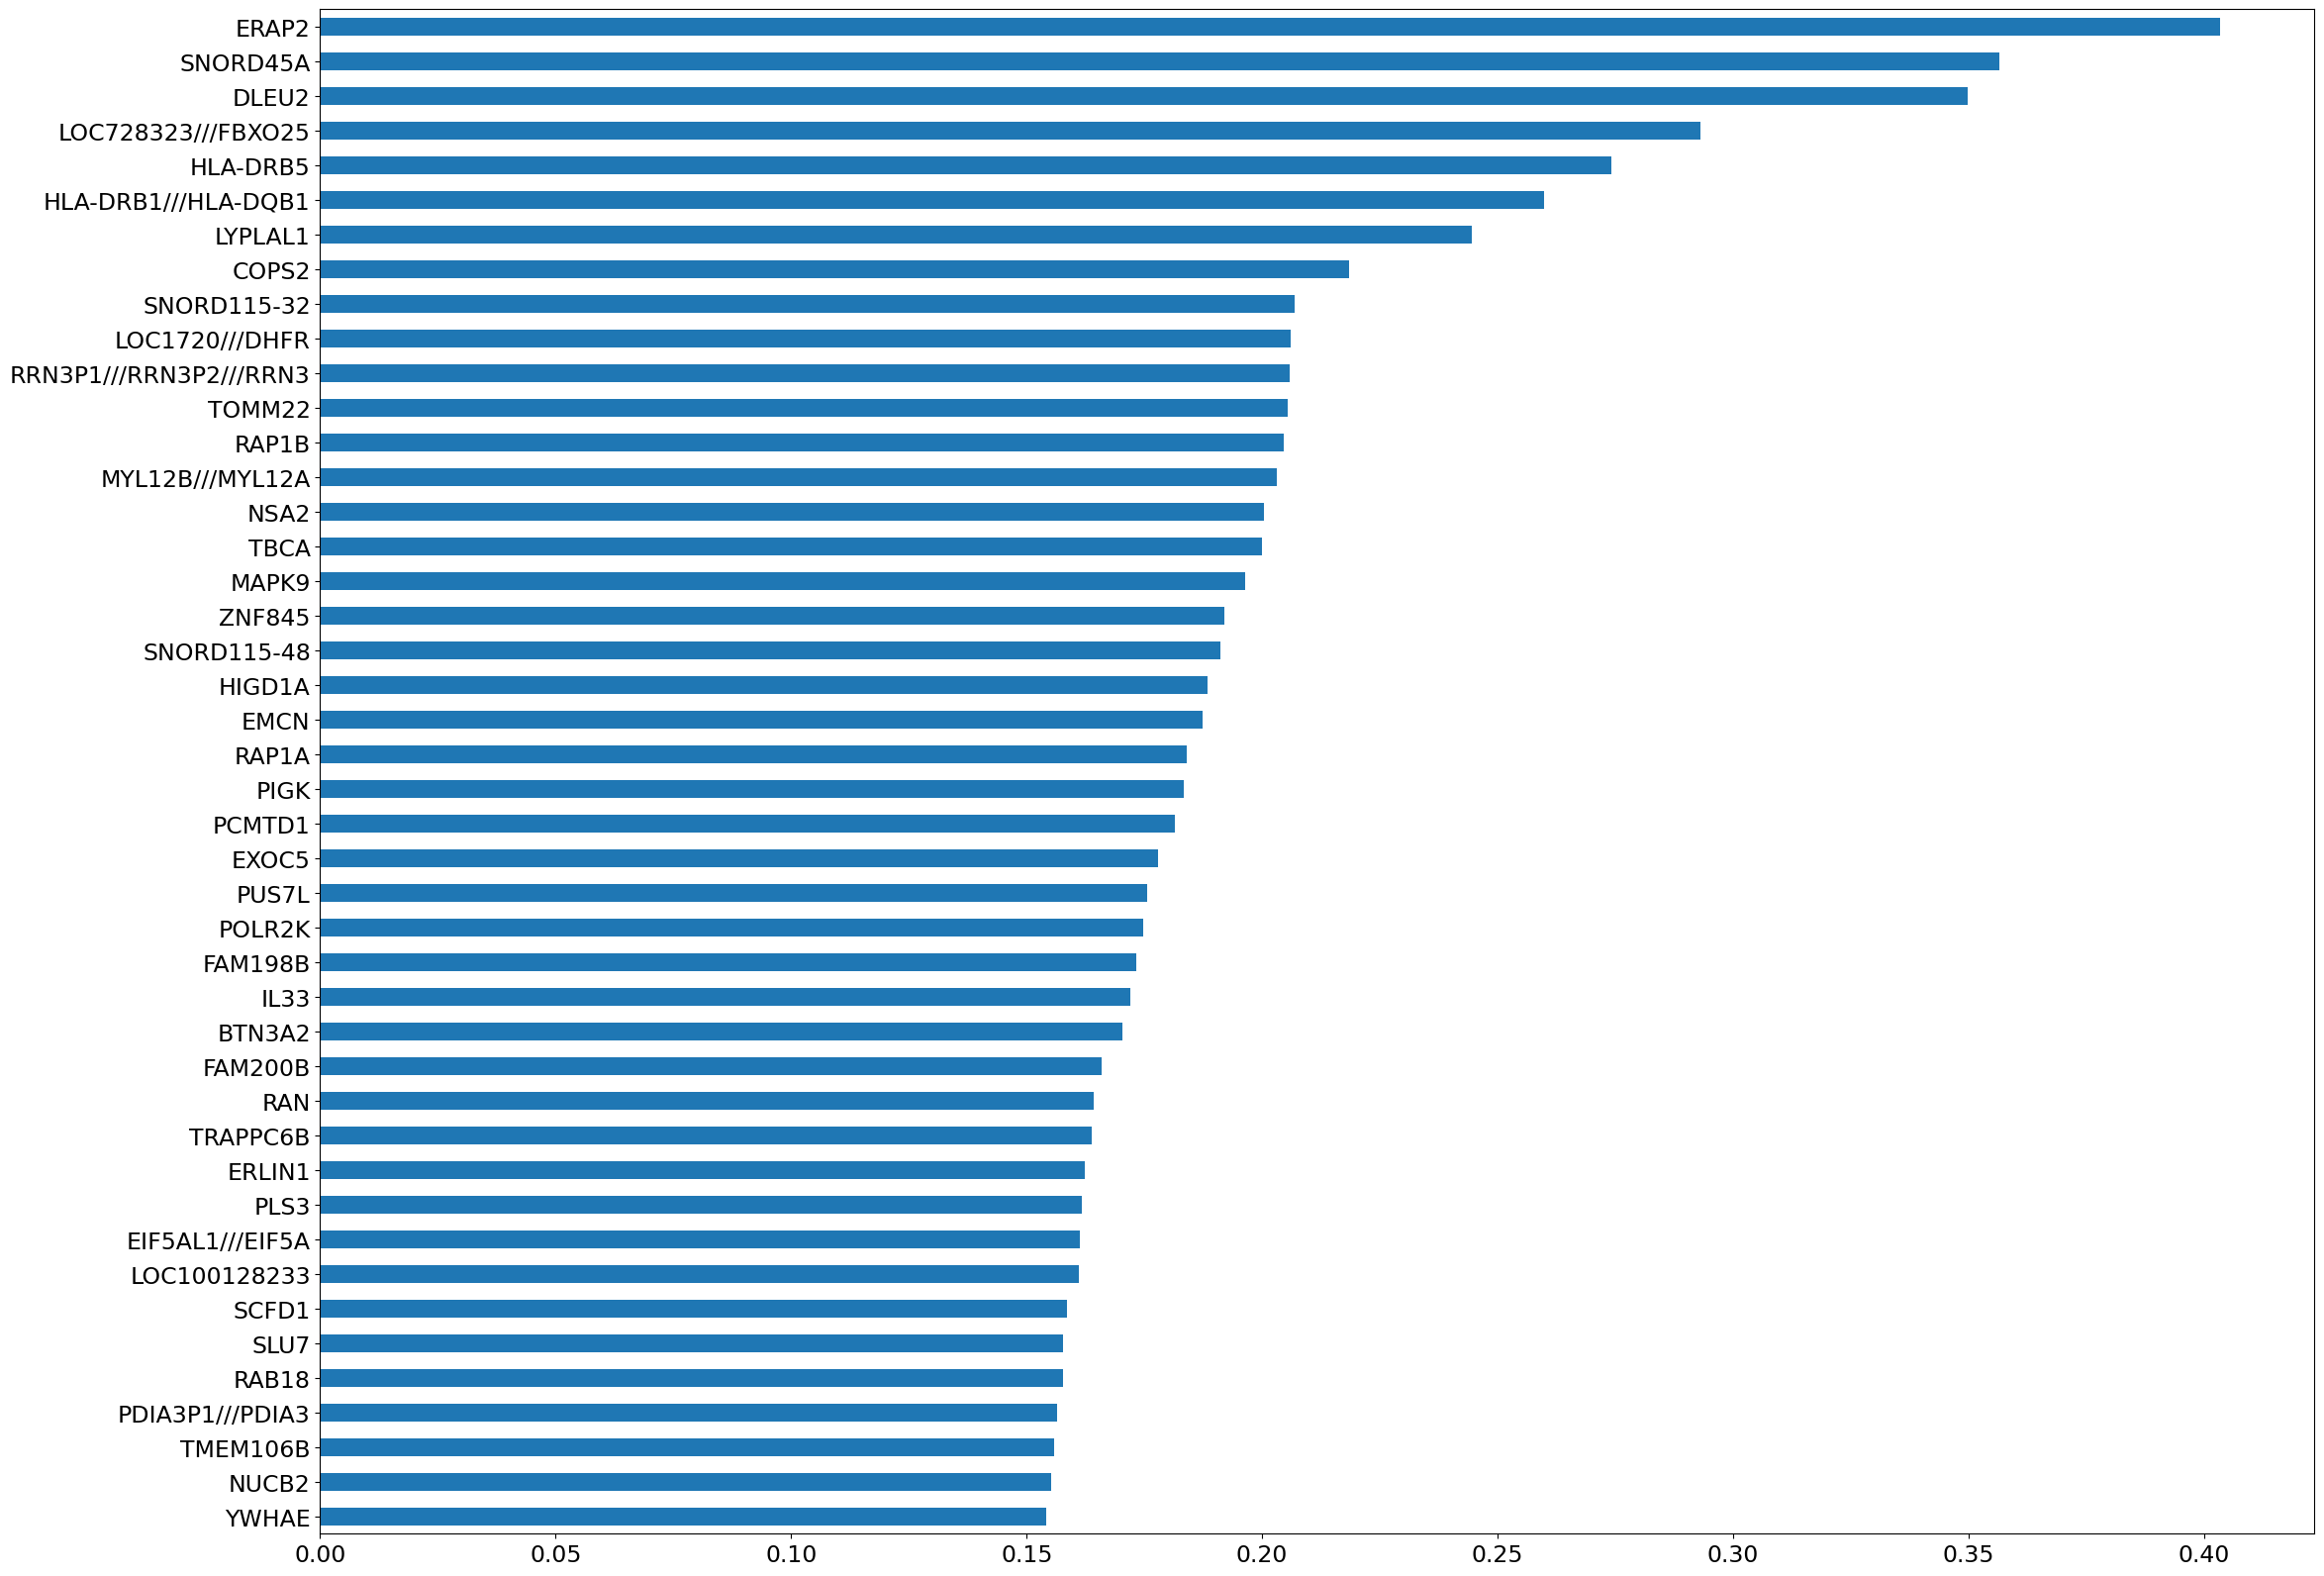

In [11]:
#Merge the weights with the data of x_tain and arrange them by weight from large to small, 
#retain the top 50 genes with the largest weights get data_all_merge.csv 
#then make a bar chart of feature importance and save it
c = pd.read_csv('C:\\Users\\hemanth\\desktop\\OSA_ML\\Original\\3)ML\\GSE135917\\data_all_merge_RF(GSE135917).csv')
c = c.set_index('ID')
plt.figure(figsize=(26, 20))
c.iloc[:,-1].plot(kind='barh')  # 横向柱状图
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.ylabel('')
plt.savefig(r'feature_importance', dpi=600)
plt.show()

In [12]:
# feature_sorted.csv is a sorted list of feature columns sorted from largest to smallest by weight value
feature_importance = pd.read_csv('C:\\Users\\hemanth\\desktop\\OSA_ML\\3)ML\\GSE135917\\data_all_merge_RF(GSE135917).csv')
# Save features whose absolute weights are greater than mean wight of all features (0.0204)
feature_importance

,ID,GSM4037879,GSM4037880,GSM4037881,GSM4037882,GSM4037883,GSM4037884,GSM4037885,GSM4037886,GSM4037887,GSM4037888,GSM4037889,GSM4037890,GSM4037891,GSM4037892,GSM4037893,GSM4037894,GSM4037895,GSM4037896,Weights
0,YWHAE,10.844390,11.083270,10.874980,11.235930,10.459610,9.989271,10.968590,11.067510,11.203880,11.433350,11.235200,10.975690,11.592520,11.873920,11.613980,10.975220,10.733230,11.564990,0.154173
1,NUCB2,8.378801,8.210627,8.324997,8.313333,7.972970,6.989598,8.327387,8.224548,8.539574,8.547485,8.464928,8.634485,8.954596,8.959415,8.809958,8.375358,8.094545,8.634024,0.155214
2,TMEM106B,7.864531,8.143947,7.696786,8.254398,7.475436,7.438466,7.960721,8.065439,8.263940,8.164442,8.278786,8.164660,8.701271,8.766939,8.752557,8.264013,7.726644,8.646299,0.155774
3,PDIA3P1///PDIA3,10.266230,9.856379,9.832886,10.016080,9.425117,9.103258,10.135170,9.801049,10.215380,10.576570,10.258410,10.355190,10.327860,10.516270,10.564280,10.150450,9.837672,10.371500,0.156491
4,RAB18,9.390251,9.579824,9.183488,9.511016,8.765575,8.480000,9.346323,9.434929,9.544214,9.908929,9.764405,9.410999,10.035390,10.256620,10.036860,9.410480,8.873795,9.991452,0.157671
5,SLU7,8.009885,8.163853,7.725014,8.130693,7.655316,7.035810,7.800899,8.033495,8.123421,8.485703,8.229570,8.022932,8.802522,8.652775,8.617552,7.966047,7.792931,8.669260,0.157731
6,SCFD1,7.916714,7.854874,7.925145,7.932577,7.281995,6.611233,7.847661,7.714288,8.015654,8.212753,8.057489,7.750876,8.632647,8.583480,8.385469,8.127112,7.588481,8.193089,0.158568
7,LOC100128233,5.052856,4.844820,5.254066,4.989917,5.295302,6.349453,5.046775,5.152178,4.864617,4.529201,4.736202,4.942772,4.253885,4.675343,4.476471,5.076944,5.074314,4.573532,0.161069
8,EIF5AL1///EIF5A,10.372940,10.297990,9.993797,10.337850,9.698058,9.312602,10.371950,10.072760,10.581440,10.863800,10.571350,10.486310,10.643280,10.919990,10.699150,9.968787,10.424740,10.702460,0.161388
9,PLS3,9.118345,9.409455,9.063534,9.660094,9.182082,8.898132,9.397806,9.532534,9.476140,9.909078,9.667414,9.416754,10.097040,10.224180,10.069490,9.732297,9.538722,9.998923,0.161806


In [13]:
feature_list = feature_importance['ID']
feature_list = feature_list[:10]
feature_list

0              YWHAE
1              NUCB2
2           TMEM106B
3    PDIA3P1///PDIA3
4              RAB18
5               SLU7
6              SCFD1
7       LOC100128233
8    EIF5AL1///EIF5A
9               PLS3
Name: ID, dtype: object

In [14]:
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [15]:
#Logistic Regression
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# Divide into training and test set
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [16]:
data

,BTN3A2,RAN,EIF5AL1///EIF5A,PIGK,HLA-DRB5,YWHAE,SNORD115-48,PDIA3P1///PDIA3,PLS3,TBCA,...,RAP1B,RAB18,ZNF845,RAP1A,TRAPPC6B,TMEM106B,MYL12B///MYL12A,HLA-DRB1///HLA-DQB1,NSA2,LOC1720///DHFR
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
GSM4037879,0.727625,-1.209141,0.052935,-0.436717,-0.802996,-0.560318,-0.638942,0.450405,-1.209141,-0.992294,...,0.055719,-0.224389,-0.704944,-0.049124,-0.023865,-0.691506,-0.673786,-0.562681,-0.880541,-1.751627
GSM4037880,-0.436552,-0.442254,-0.128473,-0.010031,0.188906,-0.028059,0.740370,-0.593710,-0.442254,0.411255,...,0.246026,0.178596,0.034103,0.174451,0.018923,-0.005216,0.128663,0.354363,0.088033,0.313358
GSM4037881,-2.498962,-1.353533,-0.864738,-0.906858,-1.334608,-0.492159,0.096760,-0.653560,-1.353533,0.810863,...,-0.291230,-0.663915,-0.416719,-0.664255,-0.725277,-1.103515,0.133528,-0.864548,0.750284,-0.734983
GSM4037882,-0.162707,0.218018,-0.031997,0.515559,-0.569073,0.312090,-0.498316,-0.186864,0.218018,0.196347,...,0.316969,0.032328,-0.069294,0.225081,-0.056486,0.266069,0.306742,0.021538,0.298213,0.260475
GSM4037883,-1.565555,-1.041235,-1.580540,-1.498232,-0.892977,-1.417665,-0.932528,-1.692371,-1.041235,-0.854380,...,-1.202061,-1.552294,-1.701836,-0.545864,-1.593693,-1.647185,-1.539416,-1.064939,-0.733197,-1.141855
GSM4037884,-1.096506,-1.789260,-2.513492,-1.404429,-0.909509,-2.465649,2.826200,-2.512323,-1.789260,-2.193543,...,-2.900509,-2.159355,-1.836921,-2.444097,-2.289566,-1.737989,-2.335820,-1.178165,-2.797351,-1.202165
GSM4037885,-0.554584,-0.472942,0.050538,-0.547474,-0.253403,-0.283583,1.566475,0.116523,-0.472942,-0.108443,...,-0.051144,-0.317769,0.736108,-1.063807,-0.345000,-0.455248,1.336151,0.276232,-0.283021,-0.016640
GSM4037886,0.412028,-0.118020,-0.673617,-1.442639,-0.496741,-0.063174,1.182692,-0.734666,-0.118020,-1.426654,...,-0.938507,-0.129414,-0.817761,-0.815006,-0.116546,-0.198045,-1.149889,-1.183779,-0.323231,-0.542047
GSM4037887,0.115805,-0.266582,0.557585,0.297956,-0.074908,0.240678,-0.635138,0.320862,-0.266582,0.423609,...,0.457544,0.102898,-0.394922,0.327692,0.483112,0.289505,0.388940,-0.643741,-0.129608,-1.065697


In [17]:
target

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [18]:
x_train

,YWHAE,NUCB2,TMEM106B,PDIA3P1///PDIA3,RAB18,SLU7,SCFD1,LOC100128233,EIF5AL1///EIF5A,PLS3
Unnamed: 0,,,,,,,,,,
GSM4037893,1.154441,0.988806,1.489626,1.209702,1.150141,1.168302,0.988400,-1.065033,0.842489,1.296513
GSM4037883,-1.417665,-0.915562,-1.647185,-1.692371,-1.552294,-1.031602,-1.374951,0.757675,-1.580540,-1.041235
GSM4037881,-0.492159,-0.114608,-1.103515,-0.653560,-0.663915,-0.872255,0.002507,0.665885,-0.864738,-1.353533
GSM4037895,-0.807999,-0.638947,-1.030179,-0.641367,-1.322245,-0.716981,-0.718538,0.265759,0.178311,-0.101719
GSM4037896,1.045284,0.588510,1.228639,0.718585,1.053615,1.286519,0.576373,-0.848976,0.850500,1.110614
GSM4037888,0.751971,0.391611,0.045122,1.241011,0.878191,0.866863,0.618488,-0.947656,1.241005,0.873930
GSM4037886,-0.063174,-0.343156,-0.198045,-0.734666,-0.129414,-0.166993,-0.449093,0.439083,-0.673617,-0.118020
GSM4037892,1.733626,1.328860,1.524950,1.087394,1.617296,1.248830,1.412488,-0.622346,1.377007,1.704021
GSM4037890,-0.267763,0.589559,0.045658,0.677035,-0.180283,-0.191143,-0.370731,-0.027052,0.327334,-0.423026


In [37]:
x_test

,YWHAE,NUCB2,TMEM106B,PDIA3P1///PDIA3,RAB18,SLU7,SCFD1,LOC100128233,EIF5AL1///EIF5A,PLS3
Unnamed: 0,,,,,,,,,,
GSM4037880,-0.028059,-0.374830,-0.005216,-0.593710,0.178596,0.131037,-0.147995,-0.245092,-0.128473,-0.442254
GSM4037885,-0.283583,-0.109170,-0.455248,0.116523,-0.317769,-0.698764,-0.163443,0.204457,0.050538,-0.472942
GSM4037887,0.240678,0.373611,0.289505,0.320862,0.102898,0.038599,0.196354,-0.201024,0.557585,-0.266582
GSM4037889,0.310464,0.203772,0.325969,0.430483,0.570969,0.281282,0.285953,-0.486875,0.533163,0.237302


In [19]:
param_grid_lr = {
                 'C': np.arange(0.1, 3., 0.5),
                 }

In [20]:
# Perform 10-fold cross validation on the training set, 
# verify the AUC on the validation set, 
# and save the AUC on the training set and validation set
from sklearn.model_selection import StratifiedKFold #Cross Validation
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i1 in range(1, len(x_train.columns)+1):
        rfc = LR(random_state=j, max_iter=10000)
        kflod = StratifiedKFold(n_splits=5, shuffle = True,random_state=j)#Divide the training/test to 5 mutually exclusive subsets
        GS = GridSearchCV(rfc, param_grid_lr, cv=kflod)
        GS.fit(x_train.iloc[:, 0:i1], y_train)
        rfc = LR(C=GS.best_params_['C'],
                            random_state=j, max_iter=10000)
        
        rfc = rfc.fit(x_train.iloc[:, 0:i1], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i1], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i1])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i1])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i1])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i1])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        best_para_train.append({'c':GS.best_params_['C']})
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i1] = fpr
        tpr_list[i1] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_lr_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_lr_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_lr_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_lr_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_para_lr_train.csv', index=False)

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8333333333333333
1.0
0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.9166666666666666
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.9166666666666666
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8958333333333334
1.0
0.9166666666666666
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.9166666666666667
1.0
0.9166666666666667
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [21]:
#From the above results, we can see that logistic regression can achieve maximum AUC when selecting the first 33 features.
#This code is used to save the information of selecting 26 feature prediction for the lagistic regression model on the test set
from sklearn.model_selection import StratifiedKFold #Cross Validation
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i1 in [10]:
        rfc = LR(random_state=j, max_iter=10000)
        kflod = StratifiedKFold(n_splits=5, shuffle = True,random_state=j)#Divide the training/test to 5 mutually exclusive subsets
        GS = GridSearchCV(rfc, param_grid_lr, cv=kflod)
        GS.fit(x_train.iloc[:, 0:i1], y_train)
        print(i1)
        rfc = LR(C=GS.best_params_['C'],
                            random_state=j, max_iter=10000)
        rfc = rfc.fit(x_train.iloc[:, 0:i1], y_train)
        
        # Score the random forest
        score_rfc = rfc.score(x_test.iloc[:, 0:i1], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i1])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i1])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i1] = fpr
        tpr_list[i1] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_lr.csv')
t1.to_csv('tpr_lr.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_lr.csv')
y_test_df.to_csv('y_test_lr.csv')

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

10
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

sensitivity: 1.0, specificity: 0.0
f1_score: 0.6667


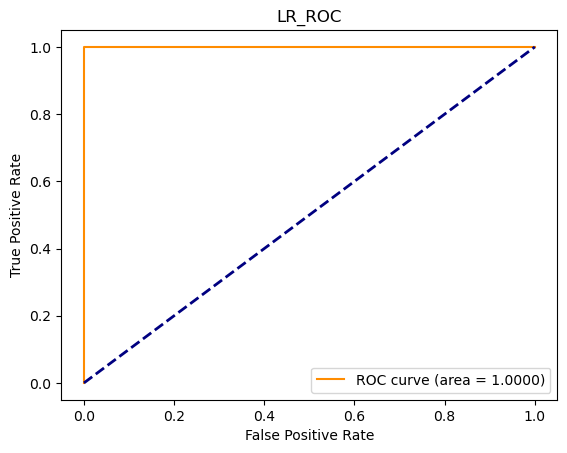

In [22]:
# This code uses the prediction information of the previous code to test the ROC curve of 
#26 feature prediction of the logistic regression model on the testfrom sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_lr.csv')
y_pred_df = pd.read_csv('y_pred_lr.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_lr.csv')
tpr_df = pd.read_csv('tpr_lr.csv')
fpr = fpr_df['10'].tolist()
tpr = tpr_df['10'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR_ROC')
plt.legend(loc="lower right")
plt.savefig(r'lr_ROC',dpi=600)
plt.show()

In [23]:
y_test

[0, 0, 1, 1]

In [24]:
x_test = pd.read_csv('test.txt',sep='\t')
x_test = x_test.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x_test = mean_norm(x_test)
y_test = pd.read_csv('C:\\Users\\hemanth\\desktop\\OSA_ML\\3)ML\\GSE135917\\test_label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [25]:
x_test

,YWHAE,NUCB2,TMEM106B,PDIA3P1///PDIA3,RAB18,SLU7,SCFD1,LOC100128233,EIF5AL1///EIF5A,PLS3
Unnamed: 0,,,,,,,,,,
GSM4037879,-0.560318,0.007810,-0.691506,0.450405,-0.224389,-0.220971,-0.015550,0.217993,0.052935,-1.209141
GSM4037880,-0.028059,-0.374830,-0.005216,-0.593710,0.178596,0.131037,-0.147995,-0.245092,-0.128473,-0.442254
GSM4037881,-0.492159,-0.114608,-1.103515,-0.653560,-0.663915,-0.872255,0.002507,0.665885,-0.864738,-1.353533
GSM4037882,0.312090,-0.141147,0.266069,-0.186864,0.032328,0.055225,0.018425,0.077892,-0.031997,0.218018
GSM4037883,-1.417665,-0.915562,-1.647185,-1.692371,-1.552294,-1.031602,-1.374951,0.757675,-1.580540,-1.041235
GSM4037884,-2.465649,-3.152992,-1.737989,-2.512323,-2.159355,-2.447942,-2.811547,3.104203,-2.513492,-1.789260
GSM4037885,-0.283583,-0.109170,-0.455248,0.116523,-0.317769,-0.698764,-0.163443,0.204457,0.050538,-0.472942
GSM4037886,-0.063174,-0.343156,-0.198045,-0.734666,-0.129414,-0.166993,-0.449093,0.439083,-0.673617,-0.118020
GSM4037887,0.240678,0.373611,0.289505,0.320862,0.102898,0.038599,0.196354,-0.201024,0.557585,-0.266582


In [26]:
# 从上面的结果可以看出,logistic regression选择前33个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试logistic regression模型选择26个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [10]:
        rfc = LR(random_state=j, max_iter=10000)
        kflod = StratifiedKFold(n_splits=5, shuffle = True,random_state=j)#将训练/测试数据集划分10个互斥子集
        GS = GridSearchCV(rfc, param_grid_lr, cv=kflod)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = LR(C=GS.best_params_['C'],
                            random_state=j, max_iter=10000)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_lr_outer.csv')
t1.to_csv('tpr_lr_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_lr_outer.csv')
y_test_df.to_csv('y_test_lr_outer.csv')

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

10
0.925


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

sensitivity: 0.9, specificity: 0.625
f1_score: 0.8182


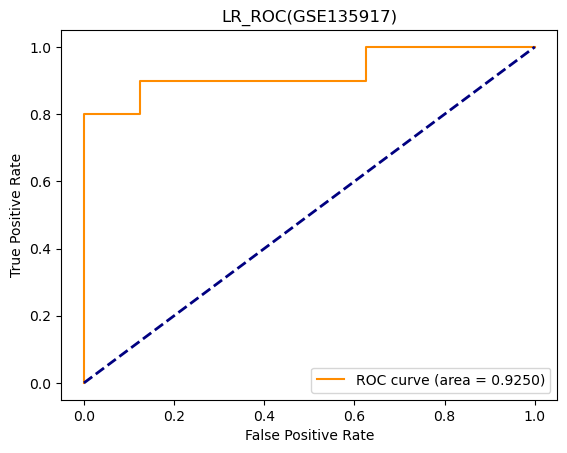

In [27]:
# 这段代码利用上段代码的预测信息，在测试集上测试logistic regression模型选择26个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_lr_outer.csv')
y_pred_df = pd.read_csv('y_pred_lr_outer.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_lr_outer.csv')
tpr_df = pd.read_csv('tpr_lr_outer.csv')
fpr = fpr_df['10'].tolist()
tpr = tpr_df['10'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR_ROC(GSE135917)')
plt.legend(loc="lower right")
plt.savefig(r'lr_ROC_outer',dpi=600)
plt.show()

In [28]:
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [29]:
param_grid_svm = {
                  'kernel': ["linear", "poly", "rbf", "sigmoid"],
                  'degree': np.arange(1, 3, 1)}

In [30]:
# 在训练集上进行10折交叉验证，在验证集上验证AUC，保存训练集和验证集上的AUC
from sklearn.model_selection import StratifiedKFold #交叉验证
from sklearn.svm import SVC
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada_train = []
auc_df_ada_train = []
acc_df_ada_test = []
auc_df_ada_test = []
best_df_para_train = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr_test = []
    auc_list_lr_test = []
    acc_list_lr_train = []
    auc_list_lr_train = []
    best_para_train = []
    for i in range(1, len(x_train.columns)+1):
        rfc = SVC(max_iter=-1, random_state=12345, probability=True)
        GS = GridSearchCV(rfc, param_grid_svm, cv=5)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = SVC(kernel=GS.best_params_['kernel'],
                            degree=GS.best_params_['degree'], probability=True,
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre_train = rfc.predict_proba(x_train.iloc[:, 0:i])[:, -1]
        y_pred_train = rfc.predict(x_train.iloc[:, 0:i])
        acc_train = accuracy_score(y_train, y_pred_train)
        fpr_train, tpr_train, thersholds = roc_curve(y_train, y_pre_train, pos_label=1)
        roc_auc_train = auc(fpr_train, tpr_train)
        acc_list_lr_train.append(acc_train)
        auc_list_lr_train.append(roc_auc_train)
        best_para_train.append({'kernel':GS.best_params_['kernel'],'degree':GS.best_params_['degree']})
        
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])
        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr_test.append(acc)
        auc_list_lr_test.append(roc_auc)
        print(roc_auc_train)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada_train.append(acc_list_lr_train)
    auc_df_ada_train.append(auc_list_lr_train)
    acc_df_ada_test.append(acc_list_lr_test)
    auc_df_ada_test.append(auc_list_lr_test)
    best_df_para_train.append(best_para_train)
pd.DataFrame(acc_df_ada_train).to_csv(f'acc_svm_train.csv', index=False)
pd.DataFrame(auc_df_ada_train).to_csv(f'auc_svm_train.csv', index=False)
pd.DataFrame(acc_df_ada_test).to_csv(f'acc_svm_test.csv', index=False)
pd.DataFrame(auc_df_ada_test).to_csv(f'auc_svm_test.csv', index=False)
pd.DataFrame(best_df_para_train).to_csv(f'best_df_svm_train.csv', index=False)

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

1
0.8333333333333333
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

2
0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

3
0.8958333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

4
0.9166666666666666
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

5
0.9583333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

6
0.9583333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

7
0.9583333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

8
0.9583333333333334
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

9
0.9583333333333334
1.0
10
0.9375
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [31]:
# 从上面的结果可以看出,SVM选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试SVM模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [5]:
        rfc = SVC(random_state=j)
        GS = GridSearchCV(rfc, param_grid_svm, cv=5)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = SVC(kernel=GS.best_params_['kernel'],
                            degree=GS.best_params_['degree'], probability=True,
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_svm.csv')
t1.to_csv('tpr_svm.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_svm.csv')
y_test_df.to_csv('y_test_svm.csv')

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

5
1.0


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

sensitivity: 1.0, specificity: 1.0
f1_score: 1.0


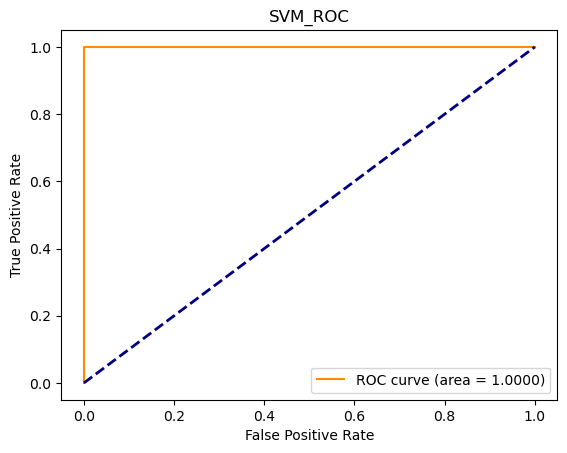

In [32]:
# 这段代码利用上段代码的预测信息，在测试集上测试SVM模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_svm.csv')
y_pred_df = pd.read_csv('y_pred_svm.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_svm.csv')
tpr_df = pd.read_csv('tpr_svm.csv')
fpr = fpr_df['5'].tolist()
tpr = tpr_df['5'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM_ROC')
plt.legend(loc="lower right")
plt.savefig(r'SVM_ROC',dpi=600)
plt.show()

In [33]:
x_test = pd.read_csv('test.txt',sep='\t')
x_test = x_test.set_index('Unnamed: 0')
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
x_test = mean_norm(x_test)
y_test = pd.read_csv('C:\\Users\\hemanth\\desktop\\OSA_ML\\3)ML\\GSE135917\\test_label.txt',sep='\t')
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]

In [34]:
# 从上面的结果可以看出,SVM选择前23个特征时能达到最大的AUC。
# 这段代码用于保存在测试集上测试SVM模型选择23个特征预测的信息
from sklearn.model_selection import StratifiedKFold #交叉验证
a1 = pd.DataFrame()
b1 = pd.DataFrame()
acc_df_ada = []
auc_df_ada = []
fpr_list = {}
tpr_list = {}
for j in range(1, 2):
    acc_list_lr = []
    auc_list_lr = []
    for i in [5]:
        rfc = SVC(random_state=j)
        GS = GridSearchCV(rfc, param_grid_svm, cv=5)
        GS.fit(x_train.iloc[:, 0:i], y_train)
        print(i)
        rfc = SVC(kernel=GS.best_params_['kernel'],
                            degree=GS.best_params_['degree'], probability=True,
                            random_state=12345)
        rfc = rfc.fit(x_train.iloc[:, 0:i], y_train)
        # 给随机森林打分
        score_rfc = rfc.score(x_test.iloc[:, 0:i], y_test)
        y_pre = rfc.predict_proba(x_test.iloc[:, 0:i])[:, -1]
        y_pred = rfc.predict(x_test.iloc[:, 0:i])

        acc = accuracy_score(y_test, y_pred)
        fpr, tpr, thersholds = roc_curve(y_test, y_pre, pos_label=1)
        roc_auc = auc(fpr, tpr)
        acc_list_lr.append(acc)
        auc_list_lr.append(roc_auc)
        print(roc_auc)
        fpr_list[i] = fpr
        tpr_list[i] = tpr
    acc_df_ada.append(acc_list_lr)
    auc_df_ada.append(auc_list_lr)
f1 = pd.DataFrame(fpr_list)
t1 = pd.DataFrame(tpr_list)
f1.to_csv('fpr_svm_outer.csv')
t1.to_csv('tpr_svm_outer.csv')
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.to_csv('y_pred_svm_outer.csv')
y_test_df.to_csv('y_test_svm_outer.csv')

C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

5
0.9625


C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hemanth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

sensitivity: 0.9, specificity: 0.875
f1_score: 0.9


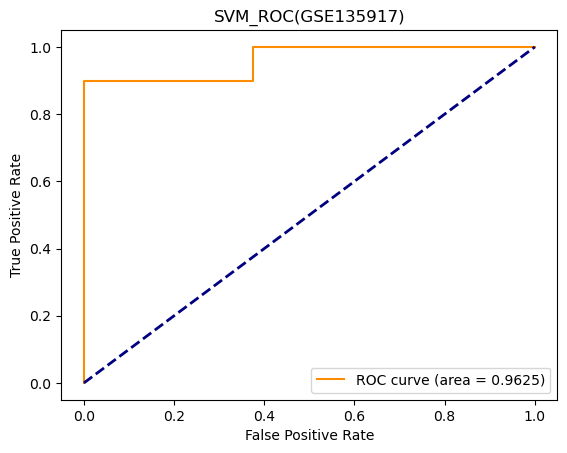

In [35]:
# 这段代码利用上段代码的预测信息，在测试集上测试SVM模型选择23个特征预测的ROC曲线
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline

y_test_df = pd.read_csv('y_test_svm_outer.csv')
y_pred_df = pd.read_csv('y_pred_svm_outer.csv')
y_test = y_test_df['label'].tolist()
y_pred = y_pred_df['0'].tolist()
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
assert np.shape(confusion) == (2, 2)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print(f'sensitivity: {round(sensitivity,4)}, specificity: {round(specificity,4)}')
print(f'f1_score: {round(f1_score(y_test, y_pred,pos_label=1),4)}')
fpr_df = pd.read_csv('fpr_svm_outer.csv')
tpr_df = pd.read_csv('tpr_svm_outer.csv')
fpr = fpr_df['5'].tolist()
tpr = tpr_df['5'].tolist()
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM_ROC(GSE135917)')
plt.legend(loc="lower right")
plt.savefig(r'SVM_ROC_outer',dpi=600)
plt.show()

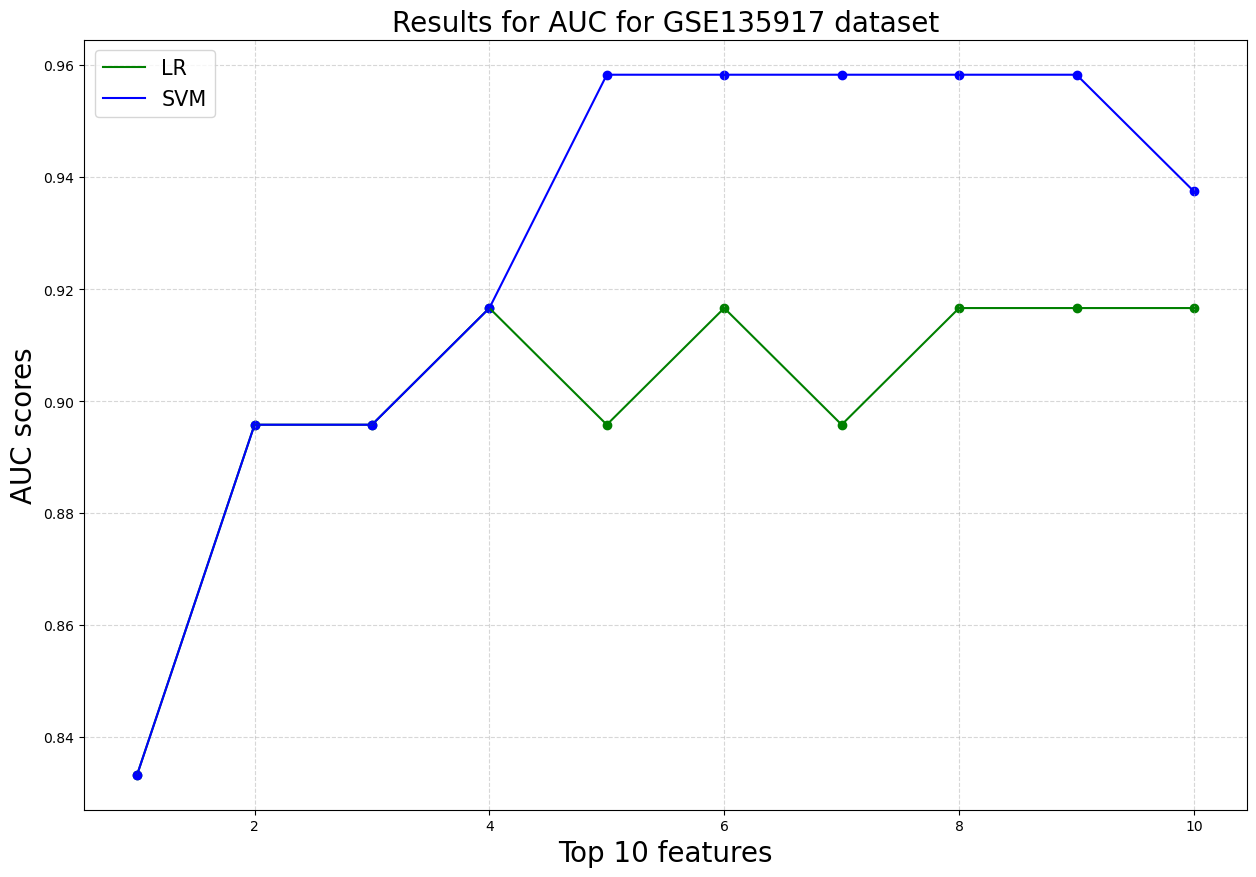

In [53]:
plt.figure(figsize=(15, 10), dpi=100)
genes_num = [i for i in range(1,11)]
plt.plot(genes_num, lr_test, c='green', label="LR")
plt.plot(genes_num, svm_test, c='blue', label="SVM")
plt.scatter(genes_num, lr_test, c='green')
plt.scatter(genes_num, svm_test, c='blue')
plt.legend(loc='best', prop={'size': 15})
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Top 10 features", fontdict={'size': 20})
plt.ylabel("AUC scores", fontdict={'size': 20})
plt.title("Results for AUC for GSE135917 dataset", fontdict={'size': 20})
plt.savefig(r'测试集AUC1.jpg',dpi=600)
plt.show()

In [54]:
lr_df = pd.read_csv('acc_lr_train.csv')
lr_test = lr_df.iloc[0,:]
svm_df = pd.read_csv('acc_svm_train.csv')
svm_test = svm_df.iloc[0,:]

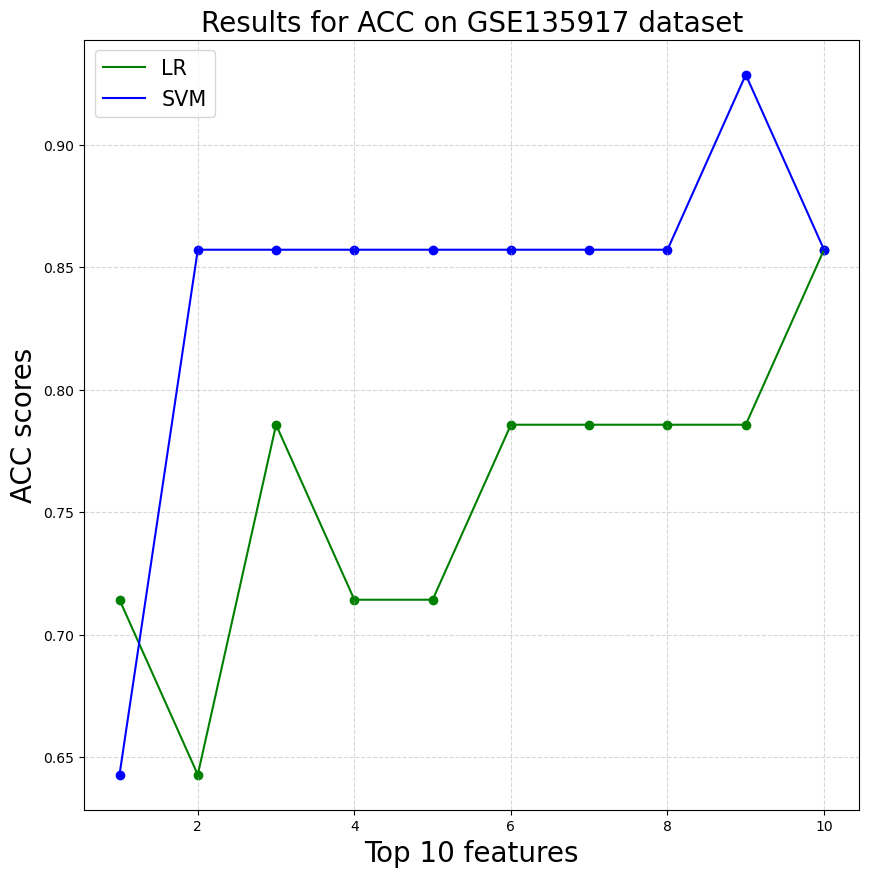

In [55]:
plt.figure(figsize=(10, 10), dpi=100)
genes_num = [i for i in range(1,11)]
plt.plot(genes_num, lr_test, c='green', label="LR")
plt.plot(genes_num, svm_test, c='blue', label="SVM")
plt.scatter(genes_num, lr_test, c='green')
plt.scatter(genes_num, svm_test, c='blue')
plt.legend(loc='best', prop={'size': 15})
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Top 10 features", fontdict={'size': 20})
plt.ylabel("ACC scores", fontdict={'size': 20})
plt.title("Results for ACC on GSE135917 dataset", fontdict={'size': 20})
plt.savefig(r'测试集ACC1.jpg',dpi=600)
plt.show()

In [84]:
# 内部验证集格式整理
data = pd.read_csv('exp.txt',sep='\t')
data = data.set_index('Unnamed: 0')
# def mean_norm(df_input):
#     return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
# data = mean_norm(data)
target = pd.read_csv('label.txt',sep='\t')
# 划分训练集和测试集
x_train,x_test, y_train, y_test = train_test_split(data,target,test_size=0.2, random_state=0)
x_train = x_train.loc[:, feature_list]
x_test = x_test.loc[:, feature_list]
x_test.to_csv('inner.csv')
y_test.to_csv('outer.csv',index=False)

In [ ]:
df.to_csv('exp.txt', sep='\t')

In [121]:
import os
import pandas as pd

inner = pd.read_csv('inner.csv')
num_cols = len(inner.columns)  # Get the number of columns

for i in range(2, min(12, num_cols)):  # Iterate up to the number of columns or 12, whichever is smaller
    x = inner.iloc[:, [0, 1, i]]
    x.columns = ['id', 'Type', 'Expression']
    x.to_csv('input_{inner.columns[i]}.txt', sep='\t', index=False)

In [123]:
import os
import pandas as pd

outer = pd.read_csv('outer.csv')
num_cols = len(outer.columns)  # Get the number of columns

for i in range(2, min(12, num_cols)):  # Iterate up to the number of columns or 12, whichever is smaller
    x = outer.iloc[:, [0, 1, i]]
    x.columns = ['id', 'Type', 'Expression']
    x.to_csv('input_{outer.columns[i]}.txt', sep='\t', index=False)